# Walmart Case Study

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [ ]:
file_id = "1qtP0s9SxaONd5iN6cGJHhmTIrKIASNuA"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)

## Dataset Explanation :-

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

In [ ]:
# Loading the dataset -
df.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
221079,1004055,P00277542,M,51-55,0,B,4+,1,1,3826
196340,1000303,P00120942,M,26-35,7,C,1,1,8,9860
472710,1000855,P00291442,F,18-25,2,A,2,1,5,6946


In [ ]:
# Shape of the dataset -
print("No. of rows:", df.shape[0])
print("No. of columns:", df.shape[1])

No. of rows: 550068
No. of columns: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# null count
df.isna().sum().reset_index(name='null_count').rename(columns={'index': 'column_name'})

,column_name,null_count
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category,0
9,Purchase,0


No missing values are found.

In [ ]:
# Checking for duplicate rows -
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape[0])

0


No duplicate rows are found.

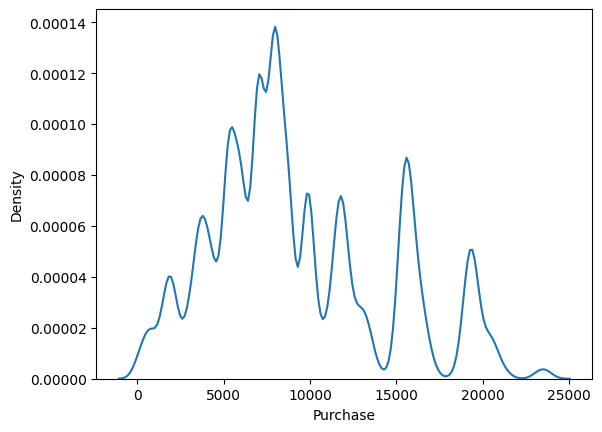

In [ ]:
sns.kdeplot(data=df, x='Purchase')
plt.show()

/tmp/ipython-input-338480164.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=cat_col[count], ax=axs[row, col], palette='Set3')
/tmp/ipython-input-338480164.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=cat_col[count], ax=axs[row, col], palette='Set3')
/tmp/ipython-input-338480164.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=cat_col[count], ax=axs[row, col], palette='Set3')
/tmp/ipython-input-338480164.py:9: FutureWarning: 

Passing `palette` without a

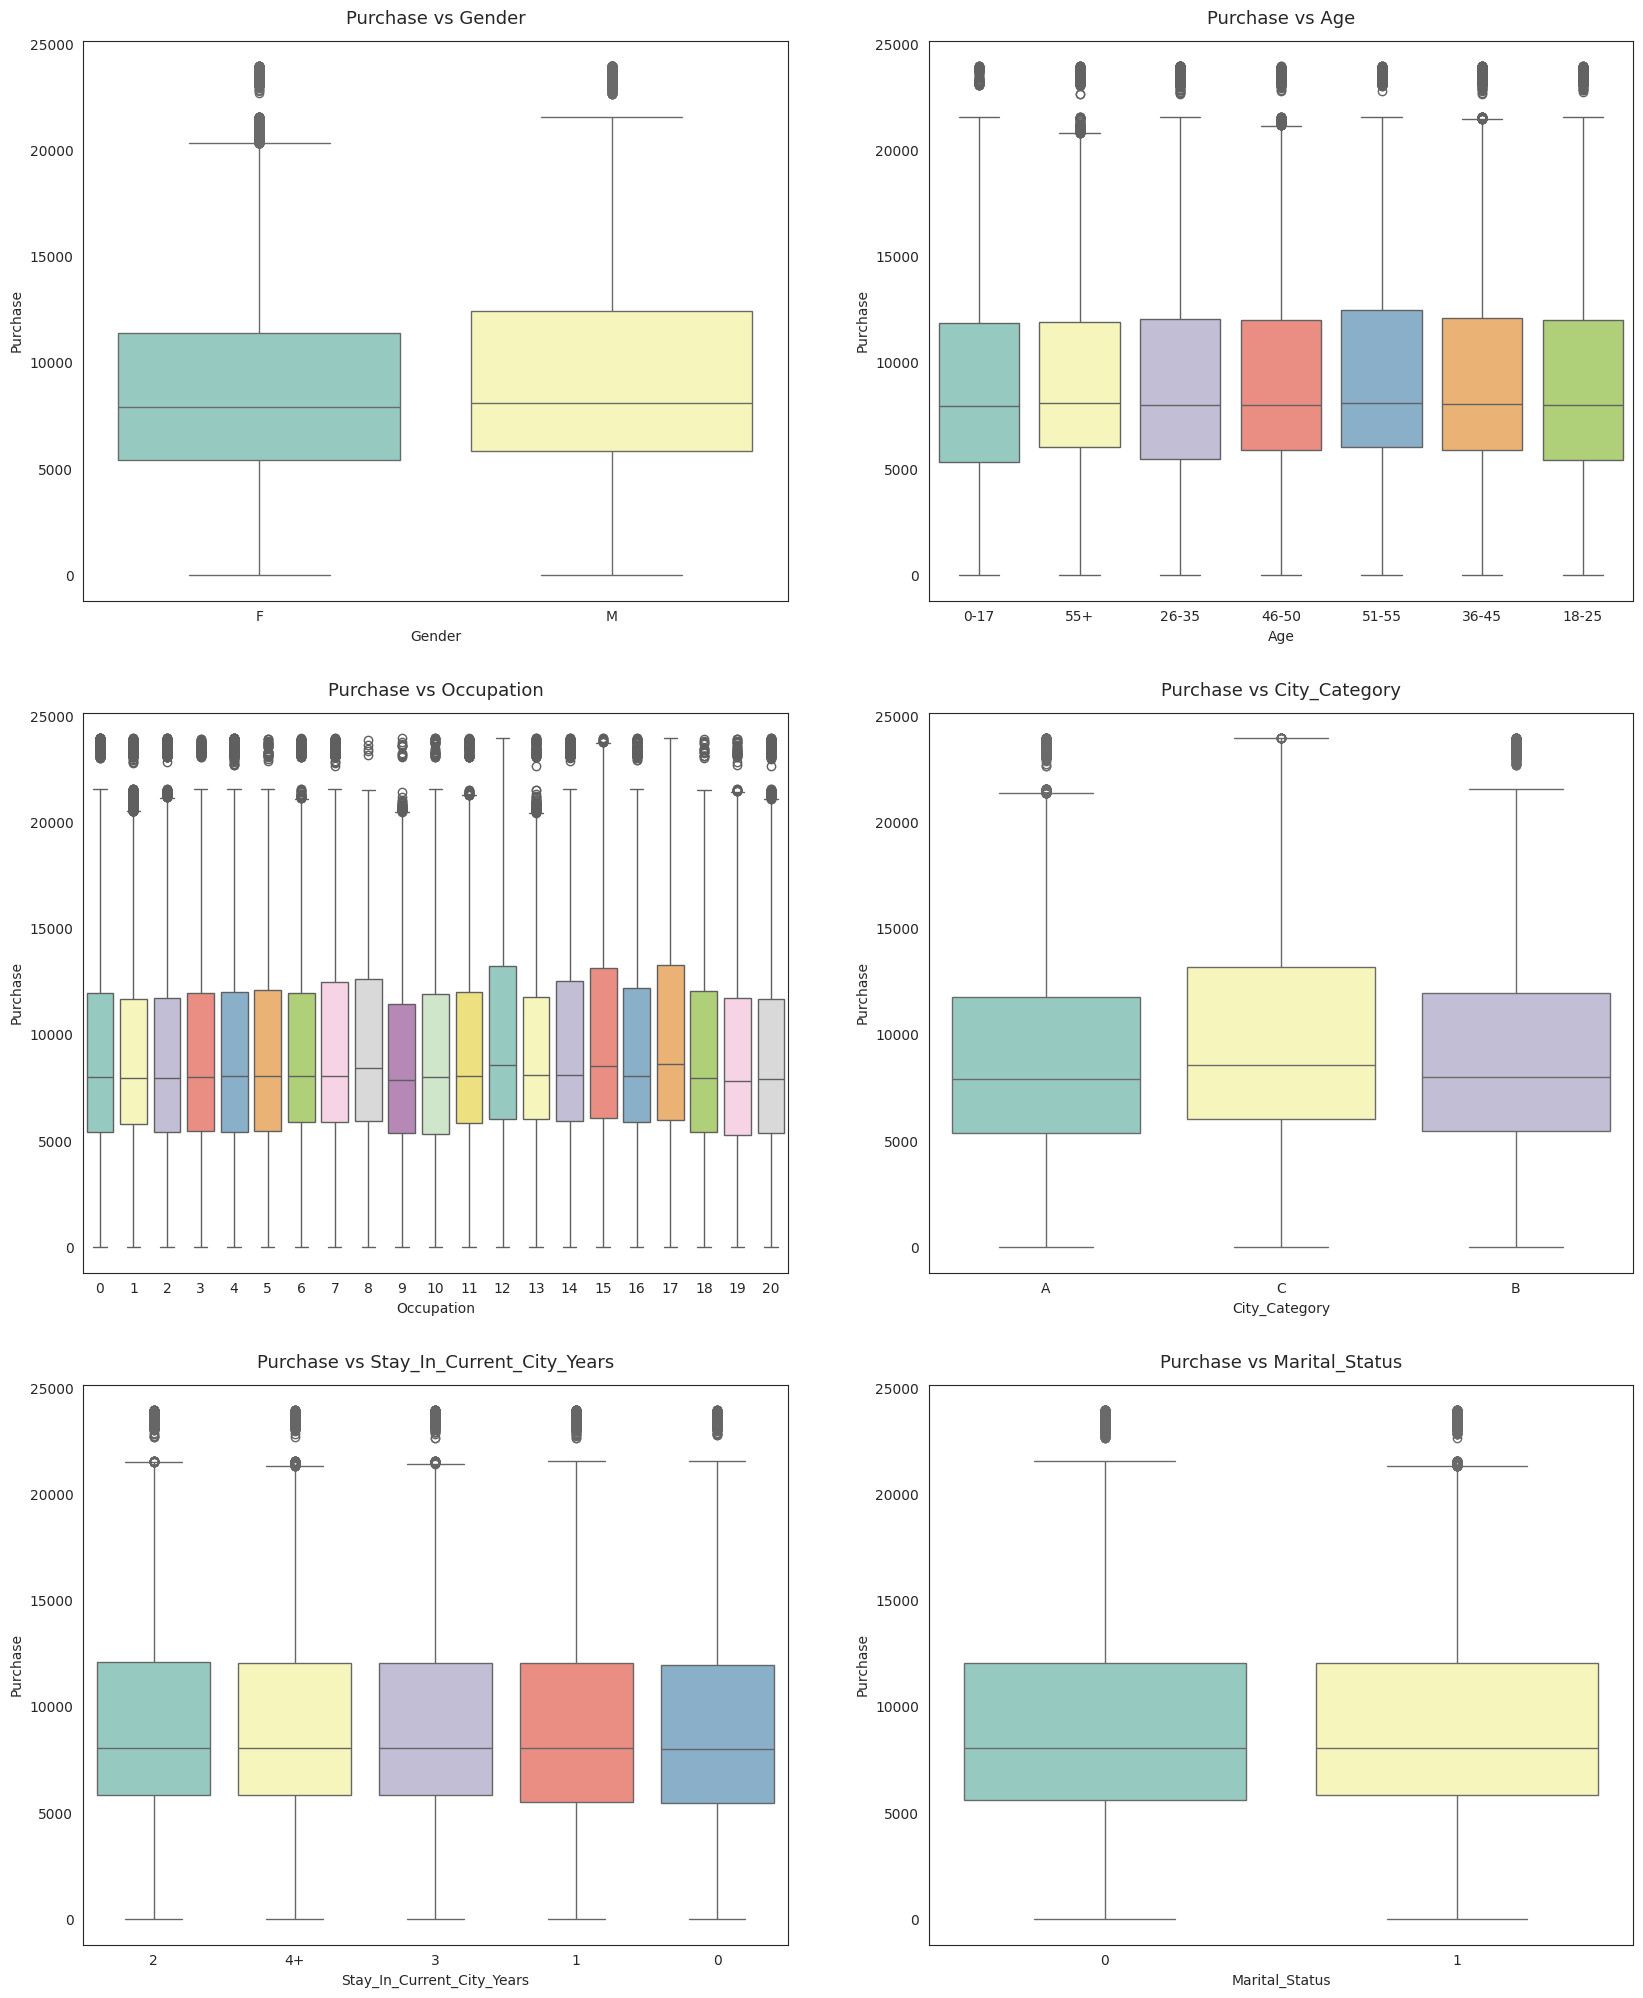

In [ ]:
cat_col = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=cat_col[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {cat_col[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


In [ ]:
q1=df['Purchase'].quantile(0.25)
q3=df['Purchase'].quantile(0.75)
print("25% Quantile: ",q1, "\n75% Quantile: ", q3)
IQR=q3-q1
outliers = df[((df['Purchase']<(q1-1.5*IQR)) | (df['Purchase']>(q3+1.5*IQR)))]
print("Number Of Outliers : ",len(outliers))
print(f"Percent outliers : {round((len(outliers)/len(df))*100,2)}%")

25% Quantile:  5823.0 
75% Quantile:  12054.0
Number Of Outliers :  2677
Percent outliers : 0.49%


In [ ]:
df_clean=df.drop(df[ (df['Purchase'] > (q3+1.5*IQR)) | (df['Purchase'] < (q1-1.5*IQR)) ].index)
df_clean.info()
df = df_clean.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     547391 non-null  int64 
 1   Product_ID                  547391 non-null  object
 2   Gender                      547391 non-null  object
 3   Age                         547391 non-null  object
 4   Occupation                  547391 non-null  int64 
 5   City_Category               547391 non-null  object
 6   Stay_In_Current_City_Years  547391 non-null  object
 7   Marital_Status              547391 non-null  int64 
 8   Product_Category            547391 non-null  int64 
 9   Purchase                    547391 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 45.9+ MB


Outlier records were removed based on the Purchase column. These values represented only 0.4% of the total data, and so their removal has a minimal impact on overall analysis

In [ ]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [ ]:
# Statistical summary of the dataset -
df.describe(include='object').T

,count,unique,top,freq
Product_ID,547391,3631,P00265242,1880
Gender,547391,2,M,412171
Age,547391,7,26-35,218661
City_Category,547391,3,B,230114
Stay_In_Current_City_Years,547391,5,1,192845


In [ ]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
User_ID,547391.0,1.003028e+06,1727.356809,1000001.0,1001516.0,1003075.0,1004478.0,1006040.0
Occupation,547391.0,8.074627e+00,6.521586,0.0,2.0,7.0,14.0,20.0
Marital_Status,547391.0,4.094861e-01,0.491739,0.0,0.0,0.0,1.0,1.0
Product_Category,547391.0,5.378945e+00,3.927383,1.0,1.0,5.0,8.0,20.0
Purchase,547391.0,9.195627e+03,4938.872953,12.0,5721.0,8038.0,12019.0,21399.0


In [ ]:
categorical_cols = ['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'City_Category']

percentage_fun = lambda count: round(count * 100 / len(df), 2)

metric_stats = (
    df[categorical_cols]
    .melt()
    .rename(columns={'variable': 'metric'})
    .groupby(['metric', 'value'])
    .agg(total_count=('value', 'count'))
    .reset_index()
)

metric_stats['percentage'] = metric_stats['total_count'].apply(percentage_fun)

metric_stats.sort_values(by=['metric', 'percentage'], ascending=[True, False])

,metric,value,total_count,percentage
2,Age,26-35,218661,39.95
3,Age,36-45,109409,19.99
1,Age,18-25,99334,18.15
4,Age,46-50,45442,8.30
5,Age,51-55,38191,6.98
6,Age,55+,21322,3.90
0,Age,0-17,15032,2.75
8,City_Category,B,230114,42.04
9,City_Category,C,170241,31.10
7,City_Category,A,147036,26.86


- 75% of users are male.

- 78% of customers are between 18 and 45 age, and 40% fall in the 26-35 group.

- 42% of users are from City Category B, the largest share.

- 60% of users are single, which is higher than the number of married users.

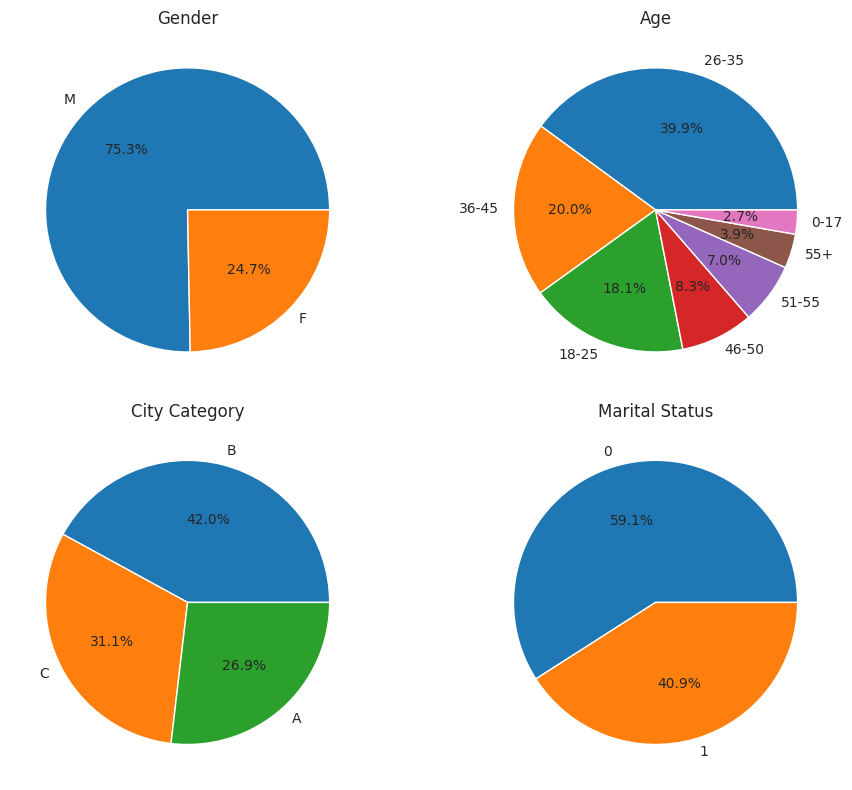

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Gender
df['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axs[0, 0], ylabel='', title='Gender'
)

# Age
df['Age'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axs[0, 1], ylabel='', title='Age'
)

# City Category
df['City_Category'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axs[1, 0], ylabel='', title='City Category'
)

# Marital Status
df['Marital_Status'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=axs[1, 1], ylabel='', title='Marital Status'
)

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

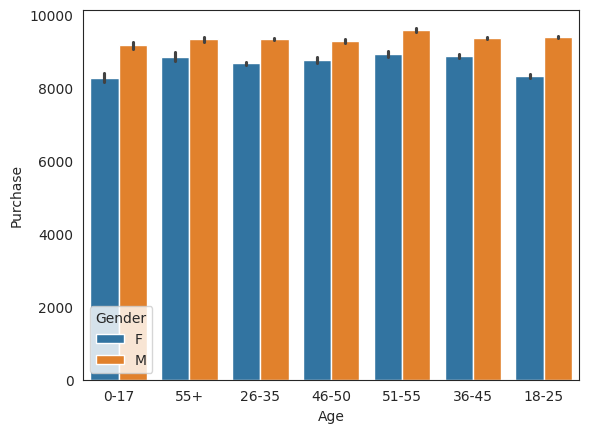

In [ ]:
sns.barplot(data=df, x='Age', y='Purchase',hue="Gender")

<Axes: xlabel='Age', ylabel='Purchase'>

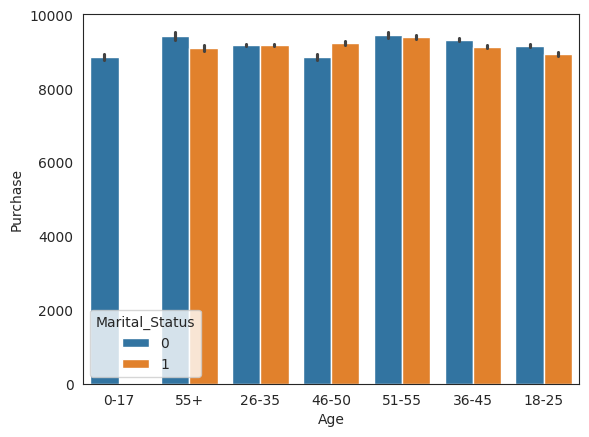

In [ ]:
sns.barplot(data=df, x='Age', y='Purchase',hue="Marital_Status")

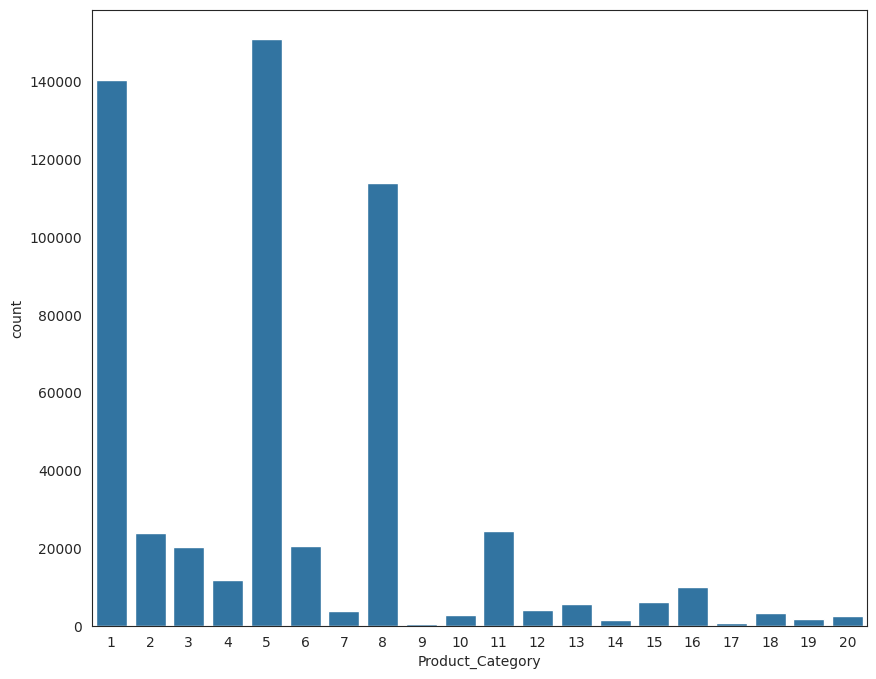

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

In [ ]:
df['Product_Category'].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(5)

,proportion
Product_Category,
5,27.573161
1,25.644923
8,20.812363
11,4.436865
2,4.359589


- Product categories 1, 5, and 8 are the top sellers, together contributing for 72% of all products sold.

- as expected 0-17 no married

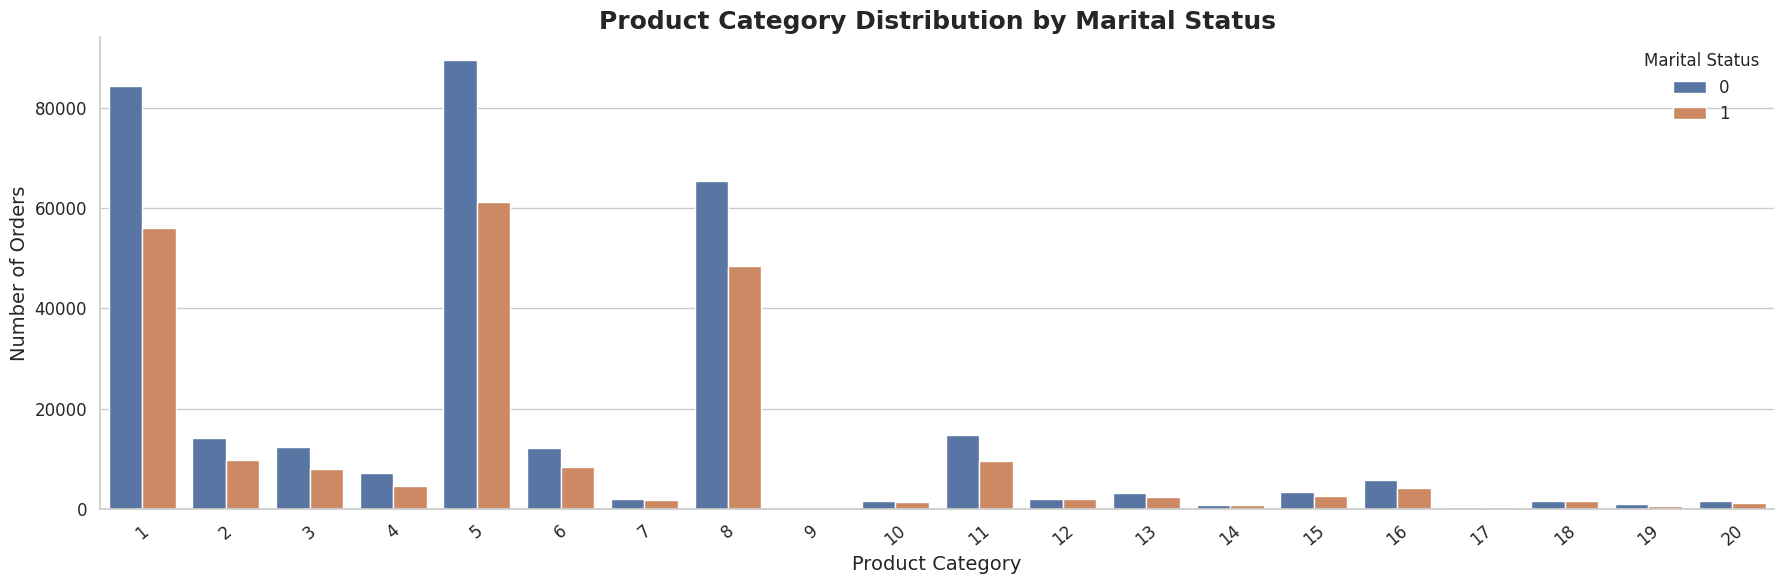

In [ ]:
plt.figure(figsize=(18, 6))

# Modern seaborn theme
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})

sns.countplot(
    data=df,
    x='Product_Category',
    hue='Marital_Status',
    palette=['#4C72B0', '#DD8452']
)

# Titles & labels
plt.title("Product Category Distribution by Marital Status", fontsize=18, weight='bold')
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)

# Improve readability
plt.xticks(rotation=40, fontsize=12)
plt.yticks(fontsize=12)

# Modern legend
plt.legend(title="Marital Status", fontsize=12, title_fontsize=12, frameon=False)

plt.tight_layout()
plt.show()


## Purchase according to Gender

In [ ]:
# Checking different metrics based on purchase by different genders -
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


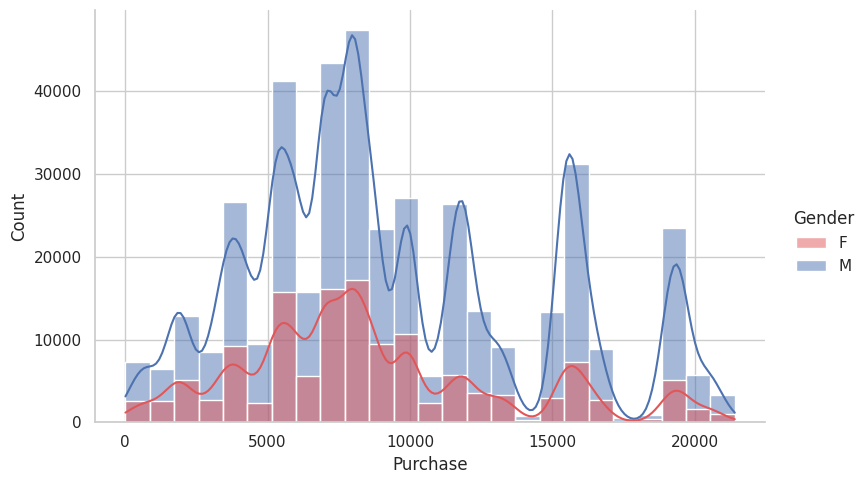

In [ ]:
sns.set_theme(style="whitegrid")

sns.displot(
    data=df,
    x='Purchase',
    bins=25,
    kde=True,
    hue='Gender',
    palette={'M': '#4C72B0', 'F': '#E15759'},
    height=5,
    aspect=1.6
)

We can see that the distribution is close to normal.

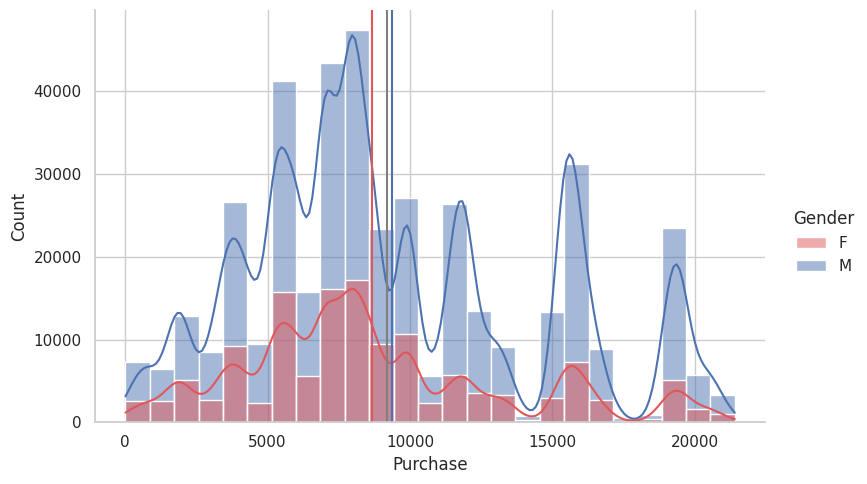

In [ ]:
sns.displot(
    data=df,
    x='Purchase',
    bins=25,
    kde=True,
    hue='Gender',
    palette={'M': '#4C72B0', 'F': '#E15759'},
    height=5,
    aspect=1.6
)

plt.axvline(x=df['Purchase'].mean(), color='grey')
plt.axvline(x=df[df['Gender']=='M']['Purchase'].mean(), color='#4C72B0')
plt.axvline(x=df[df['Gender']=='F']['Purchase'].mean(), color='#E15759')

plt.show()

The average purchase amount is similar across genders,with females spending slightly less then male.

Let's explore deeper, more granular  patterns.

In [ ]:
# Female Purchases
female_df = df[df["Gender"]=="F"]
print("Population Mean - Female Purchase amount : "+ str(female_df["Purchase"].mean()))
print("Population STD - Female Purchase amount : "+ str(female_df["Purchase"].std()))


Population Mean - Female Purchase amount : 8671.049038603756
Population STD - Female Purchase amount : 4679.058483084425



Let us pick around 1,000 random samples of size 300 from the entire data set and calculate the mean of each sample.

In [ ]:
female_sample_means=[df[df['Gender']=='F'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]


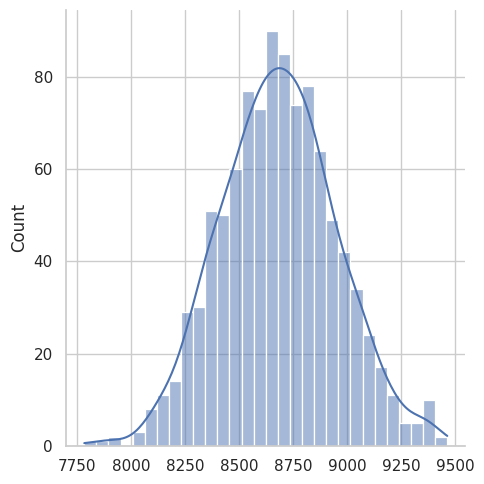

In [ ]:
sns.displot(female_sample_means,bins=30, kde=True )

Let's explore what happens when we increase the sample size from 300 to 6,000

In [ ]:
females_sample_means_600=[df[df['Gender']=='F'].sample(600, replace=True)['Purchase'].mean() for i in range(1000)]

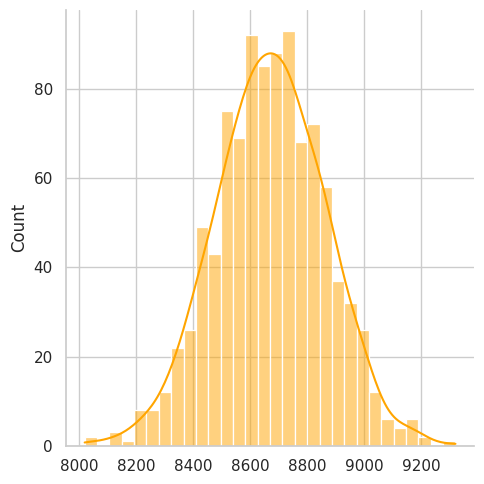

In [ ]:
sns.displot(females_sample_means_600,bins=30, kde=True , color="orange")

we can see that as we increased the sample size the distribution is better , more normal and the deviation is also less.

The larger the sample size, the more closely the sampling distribution will follow a normal distribution.

In [ ]:
print("Sample distribution mean for females : ",sum(females_sample_means_600) / len(females_sample_means_600))

Sample distribution mean for females :  8671.897679999985


**Lets** do the same for male

In [ ]:
# Male Purchases
Male_data = df[df["Gender"]=="M"]
print("Population Mean - Male Purchase amount: "+ str(Male_data["Purchase"].mean()))
print("\nPopulation STD - Male Purchase amount: "+ str(Male_data["Purchase"].std()))

Population Mean - Male Purchase amount: 9367.724354697444

Population STD - Male Purchase amount: 5009.234087946683


In [ ]:
male_sample_means=[df[df['Gender']=='M'].sample(300, replace=True)['Purchase'].mean() for i in range(1000)]

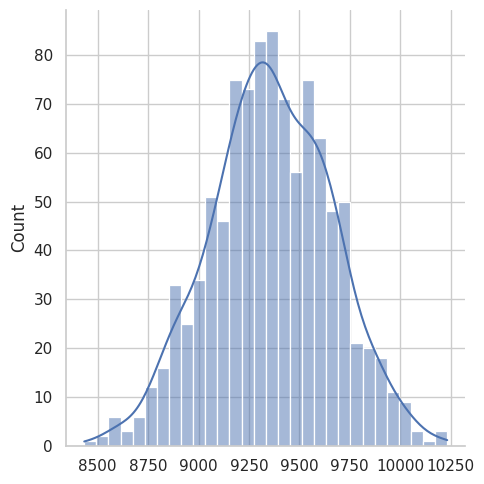

In [ ]:
sns.displot(male_sample_means,bins=30, kde=True )

In [ ]:
print("Sample distribution mean for males : ",sum(male_sample_means) / len(male_sample_means))

Sample distribution mean for males :  9359.52446


The mean of this sampling distribution (or in other words, the mean of all the sample means that we had taken), came out pretty close to the original population mean.
- females
  - original= 8671
  - sample= 8670

- males
  - original= 9367
  - sample= 9364

 This demonstrates proves that the Central Limit theorem.
Sampling Distribution Mean ~ Population Mean

- on average male spend more than females
- **but we also need to check the confidence intervals**

## Confidence Interval : Female

### Method - 1

In [ ]:
# For females -
lower_limit_f = pd.Series(female_sample_means).mean() - (np.std(female_sample_means)/ np.sqrt(1000)) * 1.96
upper_limit_f = pd.Series(female_sample_means).mean() + (np.std(female_sample_means)/ np.sqrt(1000)) * 1.96

In [ ]:
print("Lower Limit for Female is {:.2f}".format(lower_limit_f))
print("Upper Limit for Female is {:.2f}".format(upper_limit_f))

Lower Limit for Female is 8667.73
Upper Limit for Female is 8700.78


### Method - 2

In [ ]:
print("Lower Limit for Female is {:.2f}".format(np.percentile(female_sample_means,2.5)) )
print("Upper Limit for Female is {:.2f}".format(np.percentile(female_sample_means,97.5)) )

Lower Limit for Female is 8176.11
Upper Limit for Female is 9223.89


## Confidence Interval : Male

### Method - 1

In [ ]:
# For male
lower_limit_m = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * 1.96
upper_limit_m = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/ np.sqrt(1000)) * 1.96

In [ ]:
print("Lower Limit for Male is {:.2f}".format(lower_limit_m))
print("Upper Limit for Male is {:.2f}".format(upper_limit_m))

Lower Limit for Male is 9340.93
Upper Limit for Male is 9378.12


### Method - 2

In [ ]:
print("Lower Limit for Male is {:.2f}".format(np.percentile(male_sample_means,2.5)) )
print("Upper Limit for Male is {:.2f}".format(np.percentile(male_sample_means,97.5)) )

Lower Limit for Male is 8769.67
Upper Limit for Male is 9936.23


---
# Purchase according to Marital Status -
---

In [ ]:
# Mapping integer values 0/1 to Unmarried/Married -
df['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

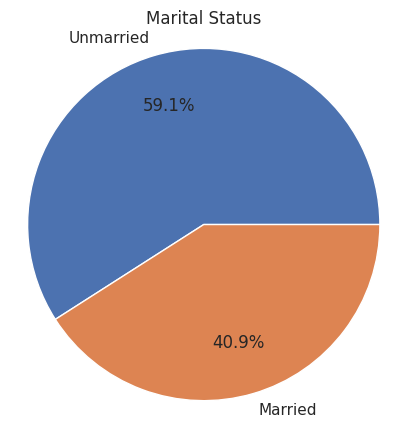

In [ ]:
# Marital Status
marital_counts = df['Marital_Status'].value_counts()
labels = marital_counts.index
sizes = marital_counts.values

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    pctdistance=0.7,
    radius=1.2
)
plt.title('Marital Status')
plt.axis('equal')
plt.show()


In [ ]:
# Number of users by marital status (married vs. unmarried)
df.groupby('Marital_Status')['User_ID'].nunique()

,User_ID
Marital_Status,
Married,2474
Unmarried,3417


In [ ]:
# checking purchase behaviour by Maritial Status -
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,224149.0,9187.040076,4925.205232,12.0,5833.0,8042.0,12006.0,21398.0
Unmarried,323242.0,9201.581849,4948.327397,12.0,5480.0,8035.0,12028.0,21399.0


In [ ]:
(df[df['Marital_Status']=='Married']['Purchase'].mean(),df[df['Marital_Status']=='Unmarried']['Purchase'].mean())

(np.float64(9187.040076020861), np.float64(9201.581848893398))

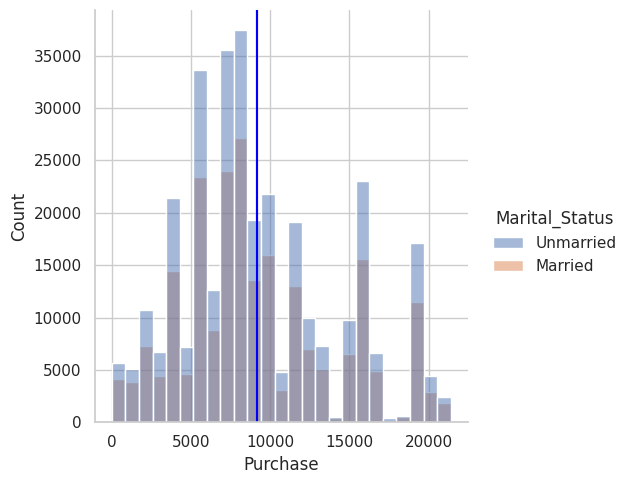

In [ ]:
# Plotting purchase behavior based on marital status (married vs. unmarried)

sns.displot(x='Purchase', data=df, bins=25, hue='Marital_Status')

plt.axvline(x=df['Purchase'].mean(), color='r')
plt.axvline(x=df[df['Marital_Status']=='Married']['Purchase'].mean(), color='orange')
plt.axvline(x=df[df['Marital_Status']=='Unmarried']['Purchase'].mean(), color='blue')


plt.show()

It is observed that the distribution is close to normal.

Let us pick around 1,000 random samples of size 300 from the entire data set and calculate the mean of each sample.

In [ ]:
sample_size=300
iterations=1000

In [ ]:
unmarried_sample_means=[df[df['Marital_Status']=='Unmarried']['Purchase'].sample(sample_size).mean() for i in range(iterations)]

In [ ]:
married_sample_means=[df[df['Marital_Status']=='Married']['Purchase'].sample(sample_size).mean() for i in range(iterations)]

Plotting the distribution of all these sample means (This is our sampling distribution). -

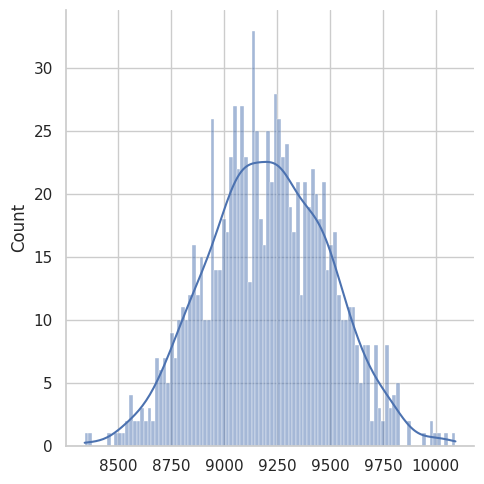

In [ ]:
sns.displot(unmarried_sample_means, bins=100, kde=True)

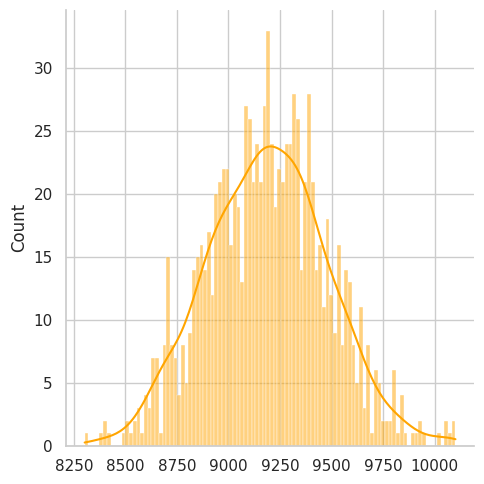

In [ ]:
sns.displot(married_sample_means, bins=100, kde=True, color='orange')

We can see that the sampling distribution is very close to normal.

Computing the mean and standard deviation of this sampling distribution.

In [ ]:
print("Mean (For unmarried):", round(pd.Series(unmarried_sample_means).mean(), 2))

Mean (For unmarried): 9207.65


In [ ]:
print("Mean (For married):", round(pd.Series(married_sample_means).mean(), 2))

Mean (For married): 9189.37


## Confidence Interval : Married

In [ ]:
lower_limit_married = pd.Series(married_sample_means).mean() - (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * 1.96
upper_limit_married = pd.Series(married_sample_means).mean() + (pd.Series(married_sample_means).std()/ np.sqrt(1000)) * 1.96

In [ ]:
print("Lower Limit for Married : {:.2f}".format(lower_limit_married))
print("Upper Limit for Married : {:.2f}".format(upper_limit_married))

Lower Limit for Married : 9171.28
Upper Limit for Married : 9207.47


## Confidence Interval : UnMarried

In [ ]:
lower_limit_unmarried = pd.Series(unmarried_sample_means).mean() - (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * 1.96
upper_limit_unmarried = pd.Series(unmarried_sample_means).mean() + (pd.Series(unmarried_sample_means).std()/ np.sqrt(1000)) * 1.96

In [ ]:
print("Lower Limit for Married is {:.2f}".format(lower_limit_married))
print("Upper Limit for Married is {:.2f}".format(upper_limit_married))

Lower Limit for Married is 9171.28
Upper Limit for Married is 9207.47


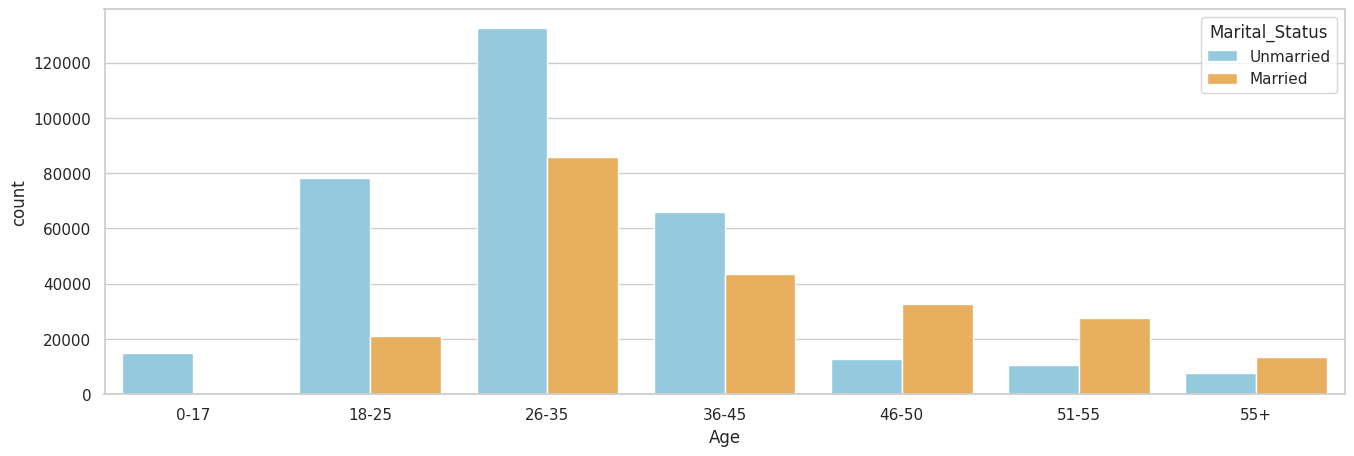

In [ ]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df, x='Age', hue='Marital_Status', palette={'Married': '#FFB347', 'Unmarried': 'skyblue'}, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()

## Insights :-

1. Male customers have a higher purchasing power
2. Female customers show lower average spend
3. Gender-based segmentation is effective


## How Walmart Can Leverage These Insights :-

1. Boost Female Spending Through Targeted Promotions.
2. Show premium recommendations to male shoppers
3. Show budget-friendly or value-focused options to female shoppers
4. Customize homepage and email content based on gender-driven behavior.


# Business Questions

**Q1. Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
female_average_mean = df[df['Gender']=='F']['Purchase'].mean()
male_average_mean = df[df['Gender']=='M']['Purchase'].mean()

if female_average_mean > male_average_mean:
    print("Yes, women are not spending more money per transaction than men.")
elif female_average_mean < male_average_mean:
    print("No, women are not spending more money per transaction than men.")
else:
    print("Men and women spend the same on average.")


No, women are not spending more money per transaction than men.


In [ ]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200


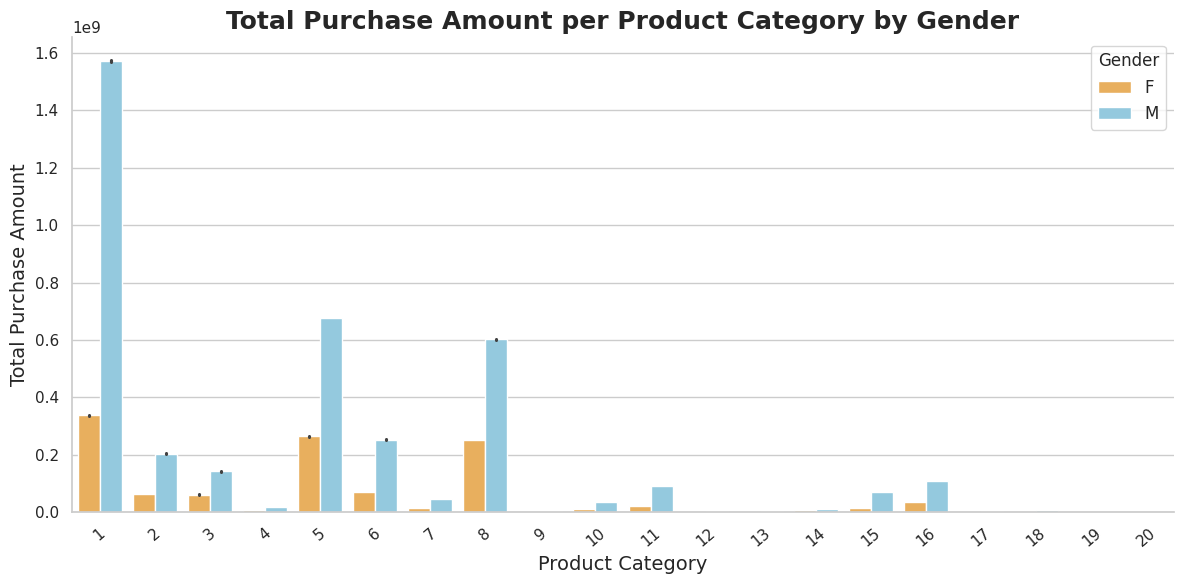

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=df,
    x='Product_Category',
    y='Purchase',
    hue='Gender',
    estimator=np.sum,
    palette={'F': '#FFB347', 'M': 'skyblue'}
)

plt.title("Total Purchase Amount per Product Category by Gender", fontsize=18, weight='bold')
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Total Purchase Amount", fontsize=14)
plt.xticks(rotation=40)
plt.legend(title="Gender", fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()
